Reading the CSV File

In [10]:
# Load the provided CSV file into a pandas DataFrame
import pandas as pd

df = pd.read_csv('acc_players-2324F.csv', skiprows=1)

#  Display the first 5 rows of the DataFrame
df.head()

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
0,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.200,0.615,4.1,-0.1,-6.4
1,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.500,0.500,NaN,NaN,3.5,0.0,-6.7
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.620,9.4,0.9,-1.3
3,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0.000,1.000,NaN,1.1,0.0,-8.2
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18.0,2.9,7.9


Basic Analysis

In [20]:
# Calculate the total points scored by all players combined
total_points = df['PTS'].sum()
total_points
# Find the player who has played the most minutes (MP).
player_most_minutes = df.loc[df['MP'].idxmax()]['Player']
player_most_minutes
# Identify the top 5 players in terms of total rebounds (TRB).
top_5_rebounders = df.nlargest(5, 'TRB')[['Player','TRB']]
top_5_rebounders

,Player,TRB
5,Armando Bacot,380
178,Ian Schieffelin,340
90,Harrison Ingram,327
44,Mohamed Diarra,311
149,Norchad Omier,309


Player Filtering

In [37]:
# Create a new DataFrame containing only players who played more than 500 minutes.
new_df = df[df['MP'] > 500]
print(new_df)
# From this filtered DataFrame, determine the player with the highest total assists (AST).
player_highest_assists = new_df.loc[new_df['AST'].idxmax()]['Player']
print(player_highest_assists)
# Who are the top 3 Assist Leads in the League?
top_3_assists = df.nlargest(3, 'AST')[['Player','AST']]
print(top_3_assists, "\n")
# Who are the top 3 Shot Blockers?
top_3_blockers = df.nlargest(3, 'BLK')[['Player','BLK']]
print(top_3_blockers)

      Rk            Player Class Pos          School   G    MP  TRB  AST  STL  \
2      3     Prince Aligbe    SO   F  Boston College  35   651  119   21   15   
4      5       Zack Austin    JR   F      Pittsburgh  33   746  137   29   32   
5      6     Armando Bacot    SR   F  North Carolina  37  1123  380   56   22   
7      8     Reece Beekman    SR   G        Virginia  34  1114  124  212   68   
9     10        Chris Bell    SO   F        Syracuse  32   865   75   21   18   
..   ...               ...   ...  ..             ...  ..   ...  ...  ...  ...   
203  204     Jamir Watkins    JR   F   Florida State  33   928  199   91   64   
206  207         Tre White    SO   G      Louisville  29   907  170   39   24   
207  208  Chauncey Wiggins    SO   F         Clemson  36   639   76   33    6   
209  210   Curtis Williams    FR   G      Louisville  32   564   42   20   12   
215  216    Jaeden Zackery    JR   G  Boston College  36  1216  119  152   63   

     ...  TOV   PF  PTS    

School-Based Analysis

In [44]:
# Group the players by School and calculate the total points scored by each school.
total_school_points = df.groupby('School')['PTS'].sum().reset_index()
print(total_school_points, "\n")
# Group the players by School and calculate the total assists (AST) for each team.
total_school_assists = df.groupby('School')['AST'].sum().reset_index()
print(total_school_assists,"\n")
# Sort the schools by total points scored and display the top 3 schools.
top_3_points_schools = total_school_points.nlargest(3,'PTS')
print(top_3_points_schools)

            School   PTS
0   Boston College  2667
1          Clemson  2785
2             Duke  2830
3    Florida State  2526
4     Georgia Tech  2272
5       Louisville  2304
6       Miami (FL)  2424
7         NC State  3101
8   North Carolina  3032
9       Notre Dame  2113
10      Pittsburgh  2495
11        Syracuse  2442
12        Virginia  2140
13   Virginia Tech  2547
14     Wake Forest  2733 

            School  AST
0   Boston College  509
1          Clemson  533
2             Duke  551
3    Florida State  406
4     Georgia Tech  425
5       Louisville  356
6       Miami (FL)  454
7         NC State  536
8   North Carolina  536
9       Notre Dame  335
10      Pittsburgh  452
11        Syracuse  442
12        Virginia  509
13   Virginia Tech  514
14     Wake Forest  429 

           School   PTS
7        NC State  3101
8  North Carolina  3032
2            Duke  2830


Extra Credit

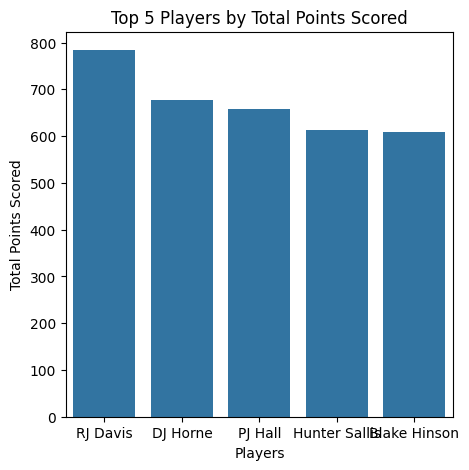

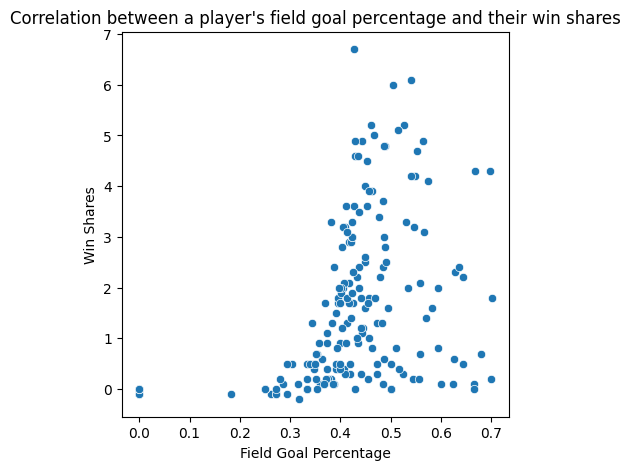

It is not likely that there is a correlation between a player's field goal percentage and their win shares, as the correlation value is  0.421066389419978


In [54]:
# Create a bar chart showing the top 5 players by total points scored (PTS).
import matplotlib.pyplot as plt
import seaborn as sns
top_5_point_makers = df.nlargest(5, 'PTS')[['Player','PTS']]
plt.figure(figsize=(5,5))
sns.barplot(x="Player", y="PTS", data=top_5_point_makers)
plt.title("Top 5 Players by Total Points Scored")
plt.xlabel("Players")
plt.ylabel("Total Points Scored")
plt.show()
# Correlation: Investigate whether there is any correlation between a player's field goal percentage (FG%) and their win shares (WS). 
correlation = df['FG%'].corr(df['WS'])
correlation
# Provide a scatter plot and calculate the correlation coefficient
plt.figure(figsize=(5,5))
sns.scatterplot(x='FG%',y='WS', data=df)
plt.title("Correlation between a player's field goal percentage and their win shares")
plt.xlabel("Field Goal Percentage")
plt.ylabel("Win Shares")
plt.show()
print("It is not likely that there is a correlation between a player's field goal percentage and their win shares, as the correlation value is ",correlation)



	Something that I learned about working with CSV files and pandas Dataframes is how easily it can be done with Python libraries and through code. As we worked on other database filetypes with SQL, utilizing these commands through python has felt a lot easier than using SQL. Maybe this is because I am more familiar with Python. It is very interesting to see how something as advanced as reading a CSV file can be done in one line of code, as well as things like filtering and manipulating the data. These skills will be applied to my future data analysis projects by helping me clean up data and also analyze data.
	The most challenging aspect of this assignment was understanding what some of the functions would do. In particular, I had to learn about some of the functions in the matplotlib library and seaborn library. These helped me create the bar plot and scatter plot for the extra credit portion of the assignment. However, I was able to overcome this by looking through the documentation on what the functions did within the code.
	The insights gained from analyzing ACC basketball statistics can be applied to other real-world datasets from different fields of work. The evaluation of a player's rebounds or assists can be compared to the evaluation of an employee's performance overall. This kind of comparison can be seen in other fields. For example, in a business aspect, we can measure the performance of a certain product. This experience will prepare me for future data science challenges by allowing me to fully understand how to read, filter, and visualize data within any field of work. Data manipulation can be done in any field of work, so this skill will allow me to develop further in this field.